In [2]:
import os
import sys
from pathlib import Path
from itertools import combinations
from json import dumps

from IPython.display import display, HTML, Markdown
import numpy as np
from scipy.stats import spearmanr
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from ncbi_remap.notebook import Nb
from ncbi_remap.plotting import make_figs

In [7]:
df = pd.DataFrame(np.random.uniform(size=100_000_000).reshape(10_000, 10_000))

In [8]:
df.shape

(10000, 10000)

In [9]:
df.memory_usage().sum() / 1024 ** 3

0.74505813419818878

MemoryError: 

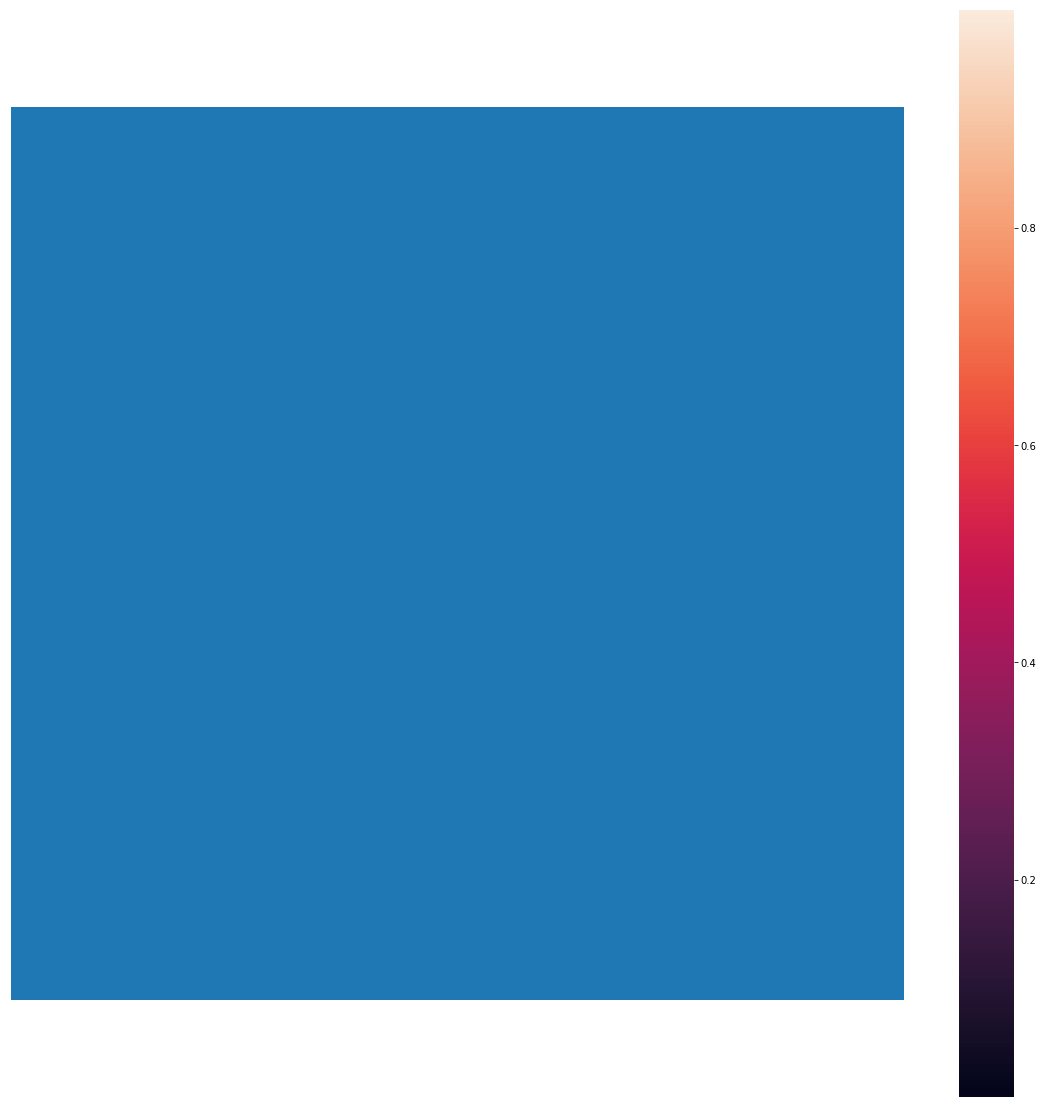

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df, xticklabels=False, yticklabels=False, ax=ax, square=True, rasterized=True)

In [6]:
%%time
vals = []
for srx1, srx2 in combinations(range(5000), 2):
    _corr = np.random.rand()
    vals.append((srx1, srx2, _corr))
    vals.append((srx2, srx1, _corr))
    
for i in range(5000):
    vals.append((i, i, 1.0))

corr1 = pd.DataFrame(vals).set_index([0, 1]).unstack()

CPU times: user 33.6 s, sys: 2.26 s, total: 35.8 s
Wall time: 35.8 s


In [7]:
%%time
with open('test.tsv', 'w') as fh:
    fh.write('\t'.join(['srx1', 'srx2', 'correlation']) + '\n')
    for srx1, srx2 in combinations(range(5000), 2):
        _corr = np.random.rand()
        fh.write(f'{srx1}\t{srx2}\t{_corr}\n'
                 f'{srx2}\t{srx1}\t{_corr}\n')
    
    for i in range(5000):
        fh.write(f'{i}\t{i}\t1.0\n')

corr3 = pd.read_csv('test.tsv', sep='\t').sort_values(by=['srx1', 'srx2'])
corr3.set_index(['srx1', 'srx2'], inplace=True)
corr3 = corr3.unstack()

CPU times: user 1min 23s, sys: 3.74 s, total: 1min 27s
Wall time: 1min 51s
